In [5]:
import functools
import itertools
import re
import sys
import time

from matplotlib.pyplot import *
from tqdm import tqdm_notebook as tqdm

import jax

from jax import lax
import jax.numpy as jnp
import jax.scipy as jsp
from jax import random

import numpy as np
import scipy as sp

In [2]:
np.random.seed(10009)

num_features = 1
num_points = 100

y = np.random.randn(num_points, num_features).astype(jnp.float32)

In [3]:
@jax.jit
def llh(y, x_loc, x_scale):
    result = jnp.sum(jsp.stats.norm.logpdf(y, loc=x_loc, scale=x_scale))
    return result

batched_llh = jax.jit(jax.vmap(llh,(1,None,None)))

In [4]:
def llh_avg(y, x_loc, x_log_scale):
    x_scale = jnp.exp(x_log_scale)
    return jnp.mean(batched_llh(y, x_loc, x_scale),0)
 
llh_avg = jax.jit(llh_avg)
llh_avg_val_and_grad = jax.jit(jax.value_and_grad(llh_avg, argnums=(1, 2)))

In [6]:
x_loc = 5.
x_log_scale = 0.

step_size = 0.01

for i in tqdm(range(1000)):

    llh_val, (x_loc_grad, x_log_scale_grad) = llh_avg_val_and_grad(y, x_loc, x_log_scale)
    x_loc += step_size * x_loc_grad
    x_log_scale += step_size * x_log_scale_grad
    if i % 10 == 0:
        print('{}\t{}'.format(i, llh_val))

/disk_c/akash/anaconda/envs/iclr/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


0	-1338.639892578125
10	-1585.385986328125
20	-585.3890380859375
30	-137.86053466796875
40	-137.54461669921875
50	-137.39547729492188
60	-137.30780029296875
70	-137.24981689453125
80	-137.20855712890625
90	-137.17767333984375
100	-137.1536102294922
110	-137.13433837890625
120	-137.1185760498047
130	-137.1054229736328
140	-137.09426879882812
150	-137.08468627929688
160	-137.07638549804688
170	-137.06912231445312
180	-137.06268310546875
190	-137.0569610595703
200	-137.0518341064453
210	-137.04721069335938
220	-137.04302978515625
230	-137.03921508789062
240	-137.03573608398438
250	-137.0325469970703
260	-137.02960205078125
270	-137.02688598632812
280	-137.0243682861328
290	-137.02203369140625
300	-137.01983642578125
310	-137.01780700683594
320	-137.01589965820312
330	-137.0141143798828
340	-137.01242065429688
350	-137.01083374023438
360	-137.0093536376953
370	-137.0079345703125
380	-137.006591796875
390	-137.00534057617188
400	-137.00413513183594
410	-137.00299072265625
420	-137.001892089

In [7]:
x_loc, x_log_scale

(DeviceArray(0.098069, dtype=float32), DeviceArray(-0.06291761, dtype=float32))

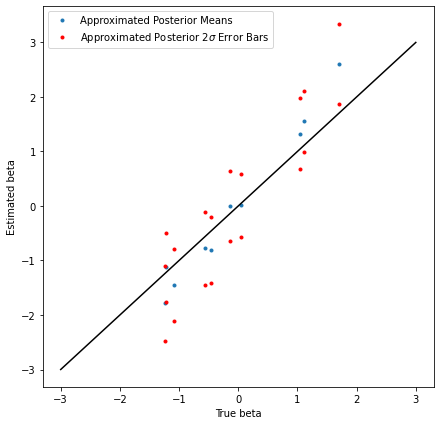

In [9]:
figure(figsize=(7, 7))
plot(true_beta, beta_loc, '.', label='Approximated Posterior Means')
plot(true_beta, beta_loc + 2*jnp.exp(beta_log_scale), 'r.', label='Approximated Posterior $2\sigma$ Error Bars')
plot(true_beta, beta_loc - 2*jnp.exp(beta_log_scale), 'r.')
plot_scale = 3
plot([-plot_scale, plot_scale], [-plot_scale, plot_scale], 'k')
xlabel('True beta')
ylabel('Estimated beta')
legend(loc='best')

In [12]:
import numpy as np
a = np.random.rand(32,10)
b = np.random.rand(32,10)
c = np.random.rand(3,10,10)

In [13]:
d = a@c
d.shape

(3, 32, 10)

In [14]:
e = b.T@d
e.shape

(3, 10, 10)